In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat('ex7data2.mat')
X = mat['X']
del mat 

# simple K-means clustering

Text(0, 0.5, 'Y')

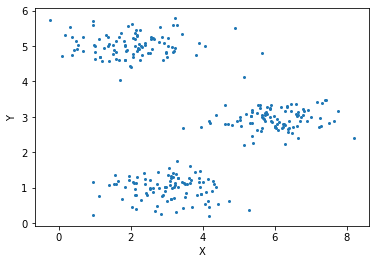

In [2]:
plt.scatter(X[:,0],X[:,1],s=4)
plt.xlabel('X')
plt.ylabel('Y')

In [201]:
def closest_cluster(X_data,c,nx=False,error_out=False):
    m = X_data.shape[0]
    if np.any(nx) == False:
        nx = len(c)
    range_list = np.zeros((m,nx))
    for i in range(nx):
        range_list[:,i] = np.sum((X_data-c[i])**2,axis=1)
    if error_out:
        return np.sum(range_list),np.argmin(range_list,axis=1)
    else:
        return np.argmin(range_list,axis=1)
    
def newmeans(X_data,y_data,nx):
    center_list  = []
    for i in range(nx):
        center_list.append(np.mean(X_data[y_data==i],axis=0))
    return center_list

def J_k_mean(X_data,c,nx):
    err = 0
    for i in range(nx):
        err += np.sum((X_data[y==i]-c[i])**2)
    return err

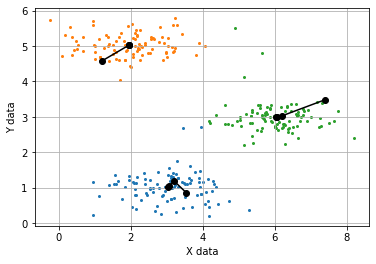

In [203]:
number_of_centroid = 3
random_int = np.random.randint(0,X.shape[0],number_of_centroid)
center_list = []
center_init = X[random_int[:],:]
center_list.append(center_init)
error0 = 1e5
while True:
    y = closest_cluster(X,center_init)
    center_init = newmeans(X,y,number_of_centroid)
    center_list.append(center_init)
    error1 = J_k_mean(X,center_init,number_of_centroid)
    if np.average(np.abs((error0-error1)/error0)) < 1e-2:
        break
    else:
        error0 = error1
def plot_k_mean(X,y,number_of_centroid,center_list_array):
    for i in range(number_of_centroid):
        plt.scatter(X[y==i][:,0],X[y==i][:,1],s=4)
        plt.plot(center_list_array[:,i,0],center_list_array[:,i,1],'-o',color='k')
    plt.xlabel('X data')
    plt.ylabel('Y data')
    plt.grid()
plot_k_mean(X,y,number_of_centroid,np.array(center_list))


c:\Users\chand\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\chand\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Using elbow method, the K-means is choosen as 3


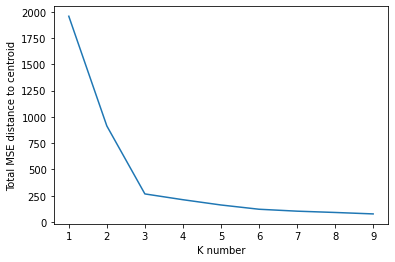

In [204]:
K_num_max = 10
J = np.zeros(K_num_max)
for K_num in range(1,K_num_max):
    for testing_num in range(10):
        number_of_centroid = K_num
        random_int = np.random.randint(0,X.shape[0],number_of_centroid)
        center_init = X[random_int[:],:]
        for i in range(50): 
            y = closest_cluster(X,center_init)
            center_init = newmeans(X,y,number_of_centroid)
        ax = J_k_mean(X,center_init,number_of_centroid)
        if J[K_num]==0 or J[K_num]>ax:
            J[K_num] = ax

plt.plot(list(range(1,J.shape[0])),J[1:])
plt.xlabel('K number')
plt.ylabel('Total MSE distance to centroid')
print('Using elbow method, the K-means is choosen as 3')

# Compression of an image using k-means clustering

In [205]:
img = plt.imread('bird_small.png')
img = img*(2**8-1)
img = img.astype('int32')
im = img.reshape((-1,3))

In [232]:
number_of_centroid = 16
m = im.shape[0]
center_list = []
err_list = []
for _ in range(100):
    error0 = 1
    j = 0
    random_int = np.random.randint(0,X.shape[0],number_of_centroid)
    center_init = im[random_int[:],:].tolist()
    while True:
        y = closest_cluster(im,center_init)
        center_init = newmeans(im,y,number_of_centroid)
        error1 = J_k_mean(im,center_init,number_of_centroid)
        if error0==error1:
            print(f'Converge at iter {j}')
            center_list.append(center_init)
            err_list.append(error1)
            break
        elif np.isnan(np.sum(center_init)):
            print(f'error, skip value')
            break
        else:
            j+=1
            error0 = error1

c:\Users\chand\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\chand\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


error, skip value
error, skip value
Converge at iter 90
Converge at iter 67
Converge at iter 66
Converge at iter 82
Converge at iter 59
error, skip value
error, skip value
error, skip value
error, skip value
error, skip value
Converge at iter 144
Converge at iter 100
Converge at iter 67
error, skip value
Converge at iter 60
Converge at iter 116
Converge at iter 75
Converge at iter 100
error, skip value
error, skip value
error, skip value
Converge at iter 72
Converge at iter 78
Converge at iter 88
error, skip value
Converge at iter 127
Converge at iter 79
Converge at iter 102
Converge at iter 80
Converge at iter 111
Converge at iter 135
Converge at iter 85
error, skip value
Converge at iter 74
Converge at iter 101
error, skip value
error, skip value
error, skip value
error, skip value
Converge at iter 190
error, skip value
Converge at iter 59
Converge at iter 66
Converge at iter 92
Converge at iter 154
error, skip value
Converge at iter 47
Converge at iter 70
Converge at iter 59
Converg

(-0.5, 127.5, 127.5, -0.5)

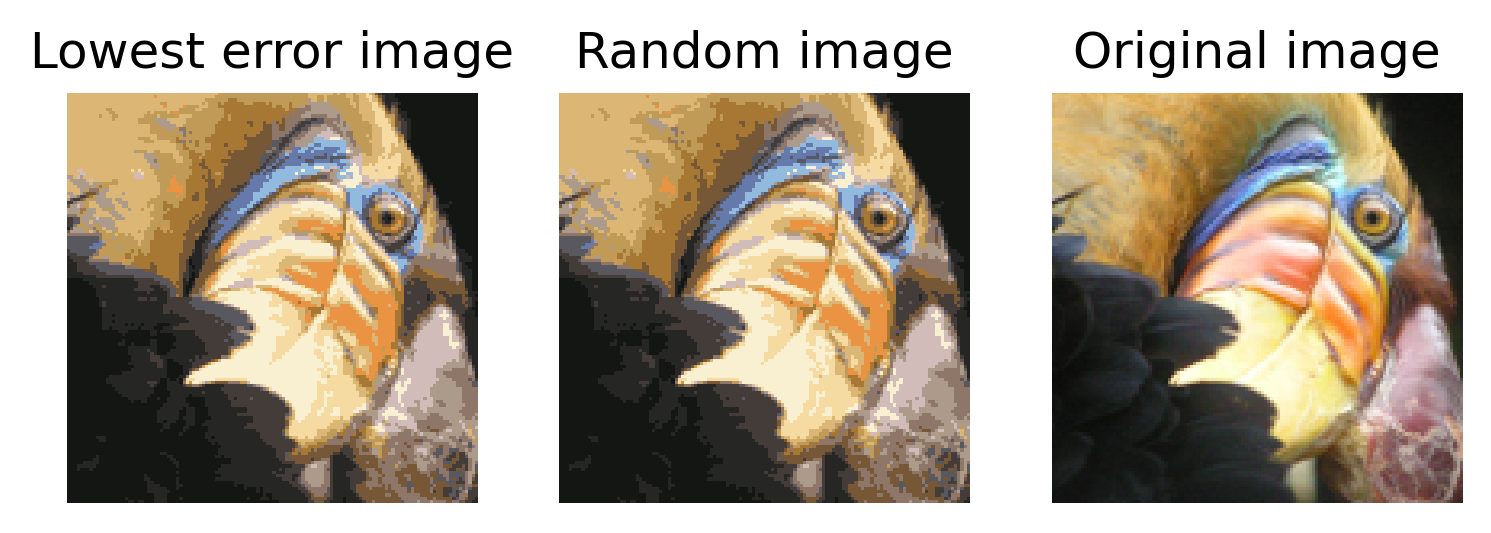

In [295]:
center_list[np.argmin(err_list)]
y = closest_cluster(im,center_init)
im2 = np.zeros(im.shape) 
for i in range(im2.shape[0]):
    im2[i,:] = center_init[:][y[i]]
im2 = im2.astype('int32').reshape((128,128,3))

center_list[2]
y = closest_cluster(im,center_init)
im3 = np.zeros(im.shape) 
for i in range(im3.shape[0]):
    im3[i,:] = center_init[:][y[i]]
im3 = im3.astype('int32').reshape((128,128,3))

plt.figure(dpi=300)
plt.subplot(1,3,1)
plt.imshow(im2)
plt.title('Lowest error image')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Random image')
plt.imshow(im3)
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')